Reading the classification dataset created on notebook 1

Reference:

Seminar 01 (week 02): page 13

In [ ]:
import pandas as pd

# reading the datatset
data = pd.read_csv('/content/drive/MyDrive/IIT /Level 5/Semester 2/Machine Learning & Data Mining/CW/final/classification_data.csv')
data.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,1.561311,0,-1.024893,-0.631472,-1.042623,1.329513,1.329513,0,-1.254637,1,1,1.186013,-0.618154,1
1,-0.446375,0,0.282269,0.812355,0.537944,-0.237720,-0.237720,0,0.216515,1,1,-0.044437,0.167067,1
2,0.445930,0,1.589430,2.256182,2.118510,-0.237720,-0.237720,0,1.545298,1,1,-0.044437,0.559678,1
3,0.445930,0,-1.024893,-0.631472,-1.042623,1.329513,1.329513,0,-0.590246,1,1,-1.520977,-0.618154,1
4,-0.780989,0,0.282269,-0.631472,-0.252339,1.329513,1.329513,0,0.501255,1,1,-1.397932,-0.618154,1


Printing all the columns on the data frame

Reference:

Seminar 01 (week 02): page 14

In [ ]:
list(data.columns)

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Mortality_Status']

Printing the dimensions of the data frame

Reference:

Seminar 01 (week 02): page 15

In [ ]:
data.shape

(4015, 14)

Checking for the class destribution on the target variable

Reference:

pandas.DataFrame.value_counts — pandas 1.4.4 documentation. (no date). pandas.pydata.org. Available from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html.

In [ ]:
# Getting th class destribution
mortality_counts = data['Mortality_Status'].value_counts()
print(mortality_counts)

Mortality_Status
1    3400
0     615
Name: count, dtype: int64


The dataset has only 15% of deceiced people on the dataset, so it is mandatory to deal with this (heavily imbalanced classes)

Reference:

Seminar 02 (week 03): page 05

In [ ]:
from sklearn.model_selection import train_test_split

# spliting the dataset
X = data.drop('Mortality_Status', axis=1)
y = data['Mortality_Status']

# stratify to maintain the class percentage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# This is to show the number of instances and input features in the training and test sets
print('X_train Instances', X_train.shape)
print('X_test Instances', X_test.shape)

X_train Instances (3212, 13)
X_test Instances (803, 13)


## Logistic Regression

### Training the model

Since the classes are heavily imbalanced I have used the class_weight parameter of the LogisticRegression model and set it to 'balanced' to balance the classes automatically.

Reference:

Gusarova, M. (2023). How to improve logistic regression in imbalanced data with class weights. Medium. Available from https://medium.com/@data.science.enthusiast/how-to-improve-logistic-regression-in-imbalanced-data-with-class-weights-1693719136aa.

Seminar 02 (week 03): page 09

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiating the model with class_weight='balanced'
logreg = LogisticRegression(class_weight='balanced')

# Training the model
logreg.fit(X_train, y_train)

# Making predictions
y_pred_LR=logreg.predict(X_test)

Printing the predictions of LR

Reference:

Seminar 02 (week 03): page 09

In [ ]:
y_pred_LR

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

Model Evaluation | Plotting confusion matrix

Reference:

Seminar 02 (week 03): page 10

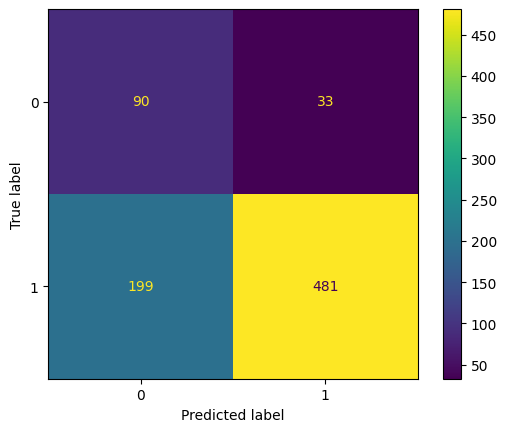

In [ ]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Constructing the confusion matrix cm
cm = confusion_matrix(y_test, y_pred_LR, labels=logreg.classes_)
# Creating a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()

Printing the classification report of LR

Reference:

Seminar 02 (week 03): page 11

In [ ]:
# Prinitng the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.31      0.73      0.44       123
           1       0.94      0.71      0.81       680

    accuracy                           0.71       803
   macro avg       0.62      0.72      0.62       803
weighted avg       0.84      0.71      0.75       803



SInce the classes are heavily imbalanced, No point in considering accuracy as a valid metric and AUC-ROC is also not a valid matric just plotting it for the report.

Reference:

Seminar 02 (week 03): page 11

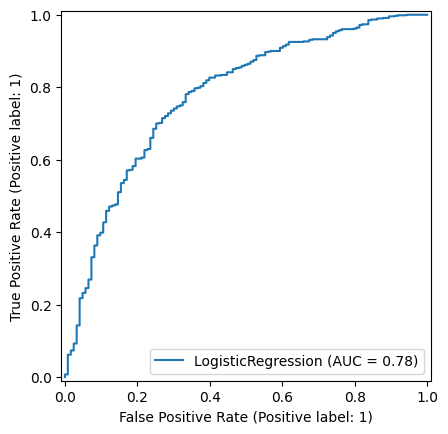

In [ ]:
# Import the function from the package
from sklearn.metrics import RocCurveDisplay
# Apply the function by specifying the name of your model and test data.
Logreg_roc = RocCurveDisplay.from_estimator(logreg, X_test, y_test)

LR model had a direct parameter that can deal with class imbalance so dealing with it and creating the model was fairly straigh forward and possible. But when I researched for similar parameters for KNN of NB it was not as straight for them.

So to deal with class imbalance I found SMOTE (Synthetic Minority Over-sampling Technique) to be an effective approach for both KNN and NB models. SMOTE works by creating synthetic examples of the minority class rather than simply duplicating existing instances. It selects minority class samples and generates new samples by interpolating between the selected instance and its neighbors. This creates more diverse synthetic examples that follow the distribution of the original data, helping models learn more robust decision boundaries between classes. Unlike simple oversampling which can lead to overfitting, SMOTE creates new information in the feature space, making it particularly effective for algorithms like KNN and Naive Bayes which are sensitive to the distribution of training data.

Applying SMOTE only on the training data, to avoid the model getting biased towards the majority (ALIVE) class. The testing dataset will not have SMOTE applited, so that the **evaluation metrics will be done on the original data**

Reference:

SMOTE for Imbalanced Classification with Python. (2024). GeeksforGeeks. Available from https://www.geeksforgeeks.org/smote-for-imbalanced-classification-with-python/.

In [ ]:
from imblearn.over_sampling import SMOTE

# oversampling only the minority class
smote=SMOTE(sampling_strategy='minority')

X_train_resampled, y_train_resampled=smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

,count
Mortality_Status,
1,2720
0,2720


Building a Logistic Regression model with SMOTE resampled data

Since I have resampled the data again with SMOTE, building another LR model to check if it gives a performance boost rather than class_weight='balanced'

Seminar 02 (week 03): page 09

In [ ]:
# instantiating the model
logreg2 = LogisticRegression()

# Training the model
logreg2.fit(X_train_resampled, y_train_resampled)

# Making predictions
y_pred=logreg2.predict(X_test)

Plotting the confusion matrix

Reference:

Seminar 02 (week 03): page 10

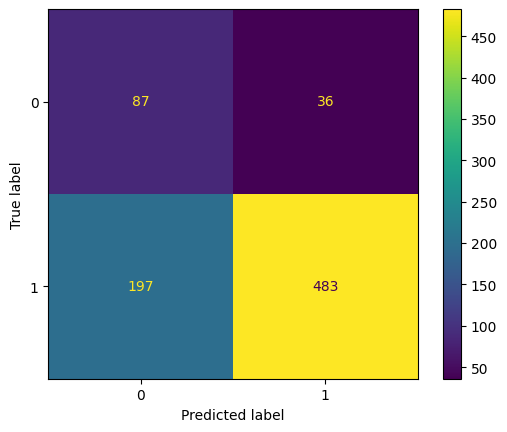

In [ ]:
# Constructing the confusion matrix cm
cm = confusion_matrix(y_test, y_pred, labels=logreg2.classes_)
# Creating a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=logreg2.classes_)
disp.plot()

Printing classification report and AUC graph

Reference:

Seminar 02 (week 03): page 11

              precision    recall  f1-score   support

           0       0.31      0.71      0.43       123
           1       0.93      0.71      0.81       680

    accuracy                           0.71       803
   macro avg       0.62      0.71      0.62       803
weighted avg       0.84      0.71      0.75       803



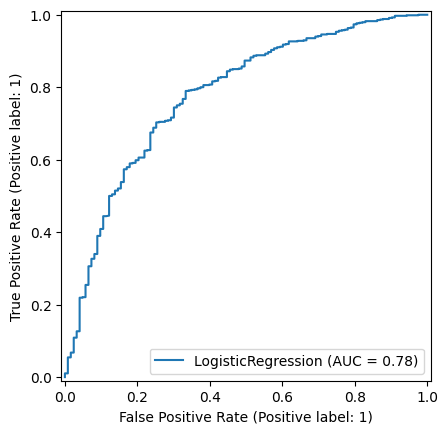

In [ ]:
# Printing the classification report
print(classification_report(y_test, y_pred))

# AUC graph
Logreg_roc = RocCurveDisplay.from_estimator(logreg2, X_test, y_test)

Both the LR models have kind of the same performance, Doing hyperparameter tuning to see if its possible to increase the performance

hyperparameters
- C (Inverse of Regularization): Controls regularization strength. Smaller values imply stronger regularization

Reference :

Qiao, F. (2019). Logistic Regression Model Tuning with scikit-learn — Part 1. Medium. Available from https://medium.com/data-science/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5.

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Defining the parameter grid
param_grid = {
  'C': np.logspace(-4, 4, 20),
  'max_iter': [100, 1000, 2500, 5000]
}

# Initializing the logistic regression model
logreg_tuned = LogisticRegression(class_weight='balanced')

# Initializing GridSearchCV
clf = GridSearchCV(logreg_tuned, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)

# Fitting the model
tuned_lr = clf.fit(X_train, y_train)

# Printing the best parameters and accuracy
print(f'Best Parameters: {tuned_lr.best_params_}')

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best Parameters: {'C': np.float64(0.615848211066026), 'max_iter': 100}


Evaluvating the tuned model

Reference:

Seminar 02 (week 03): page 11

Classification report for Ensmebler
              precision    recall  f1-score   support

           0       0.31      0.73      0.44       123
           1       0.94      0.71      0.81       680

    accuracy                           0.71       803
   macro avg       0.62      0.72      0.62       803
weighted avg       0.84      0.71      0.75       803

confusion_matrix for ensember learner


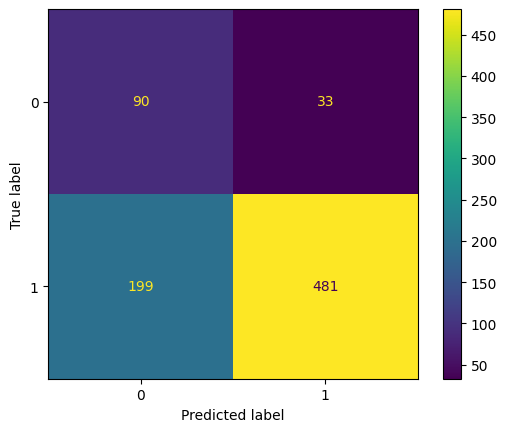

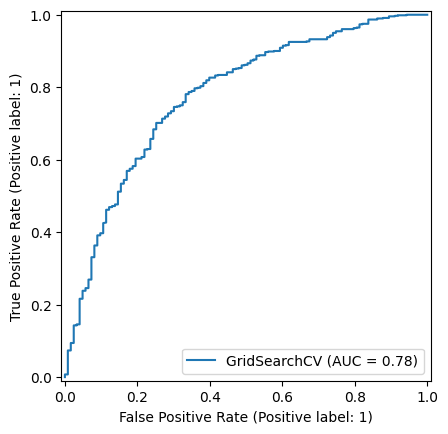

In [ ]:
# Making predictions using the tuned model
y_pred_LR_tuned = tuned_lr.predict(X_test)

# Evaluating the ensemble model by generating the classification report and the confusion matrix
print("Classification report for Ensmebler")
print(classification_report(y_test,y_pred_LR_tuned))

# Confusion matrix
print("confusion_matrix for ensember learner")
best_cls_cm=confusion_matrix(y_test,y_pred_LR_tuned)
disp=ConfusionMatrixDisplay(confusion_matrix=best_cls_cm,display_labels = tuned_lr.classes_)
disp.plot()

# ROC graph
tuned_lr_roc = RocCurveDisplay.from_estimator(tuned_lr, X_test, y_test)

## K-Nearest Neigbours (KNN)

Initializing and fitting KNN

Reference:

Seminar 03 (week 04): page 07

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 9)
# Fit the classifier to the resampled data
knn.fit(X_train_resampled,y_train_resampled)

KNeighborsClassifier(n_neighbors=9)

Making predictions on the test set and comparing it with the actual results

Reference:

Seminar 03 (week 04): page 07

In [ ]:
#Perform predictions on the test data
y_pred=knn.predict(X_test)

#Create a dataframe for comparing the actual vs predicted results by kNN mode
compare_results_knn_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
compare_results_knn_df.to_csv(r'/content/knn_pred_comparison.csv', index=True)
compare_results_knn_df

,Actual,Predicted
2721,1,1
197,1,0
3240,0,0
1300,1,1
1832,1,1
...,...,...
3105,1,1
106,0,1
2973,1,1
3752,1,1


### Evaluating the model

Printing the classification report

Reference:

Seminar 03 (week 04): page 08

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.64      0.35       123
           1       0.91      0.64      0.75       680

    accuracy                           0.64       803
   macro avg       0.58      0.64      0.55       803
weighted avg       0.81      0.64      0.69       803



Constructiong the confusion matrix

Reference:

Seminar 03 (week 04): page 08

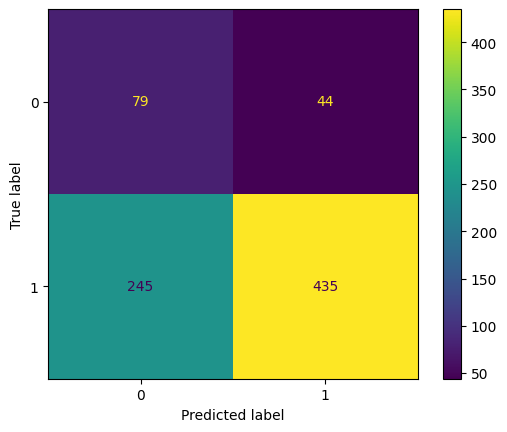

In [ ]:
#Costruct the confusion matrix based on…
#comparing actual values (y_test) vs predicted (y_pred) in test data
cm_knn = confusion_matrix(y_test, y_pred, labels = knn.classes_)

#Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()

Constructing ROC curve

Reference:

Seminar 03 (week 04): page 08

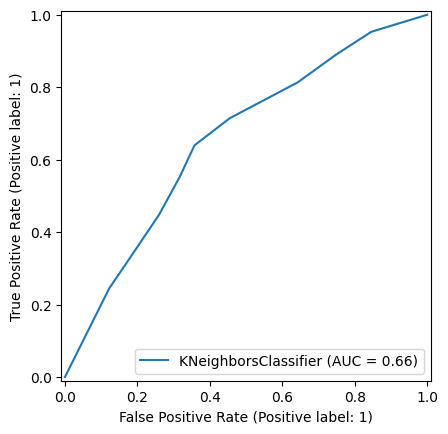

In [ ]:
knn_roc = RocCurveDisplay.from_estimator(knn, X_test, y_test)

The base level KNN model without any hyperparameter tuning is not performing very well. Trying to build a model with tuned hyperparameters.

Before doing a GridSearchCV trying to find the optimal K value by comparing the mean error for different K values and plotting them, Using the normal data and not the resampled ones to find which ones work well for the actual data distribution.

Reference:

Seminar 03 (week 04): page 09

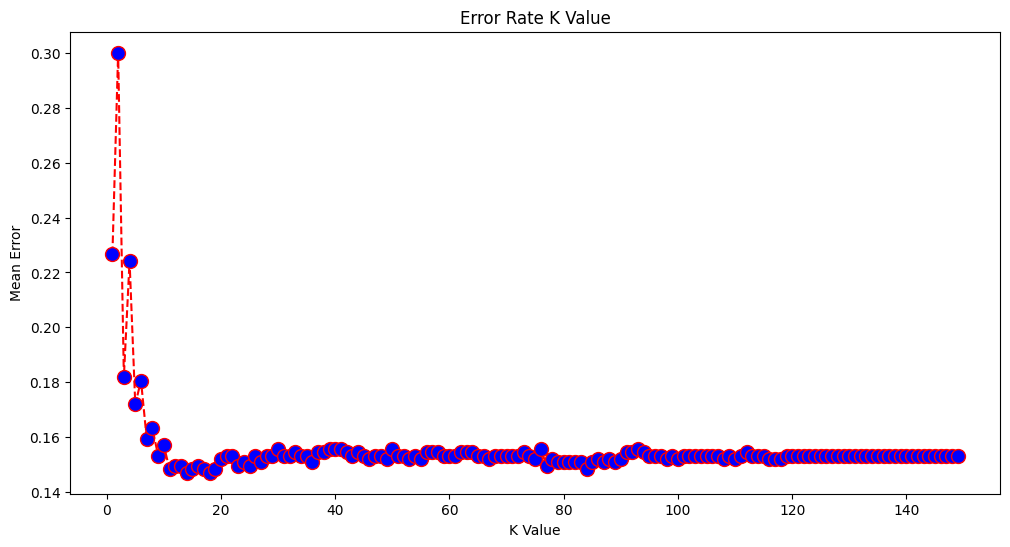

In [ ]:
# Calculating error for K values between 1 and 200
error = []
import numpy as np
import matplotlib.pyplot as plt

for i in range(1, 150):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)  # Use original training data, not resampled
    pred_i = knn2.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 150), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

From the plot above it is clear when the value for K is greater than 100 the error rate is really low and stable, So now running the GridSearchCV checking the K range from 100-200 to find the optimal value along with the optimal evaluation metric. It is clear that error is really low for larger K values

When researching on how to improve the accuracy of a KNN model, I stumbled on weighted KNN, trying to use weighted KNN rather than standard KNN. In weighted KNN closer neighbours have more influence, while further once have lower influence.

This can be helpful to our coursework cause
 - It helps address class imbalance by giving more importance to the nearest examples
 - It creates smoother decision boundaries that can better capture the complex relationships in medical data

Reference:

- Illuri, L.T. (2023). Understanding Weighted k-Nearest Neighbors (k-NN) Algorithm. Medium. Available from https://medium.com/@lakshmiteja.ip/understanding-weighted-k-nearest-neighbors-k-nn-algorithm-3485001611ce.

- Seminar 03 (week 04): page 11

In [ ]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors and distances with weighs
param_grid = {'n_neighbors': np.arange(1, 50), 'metric': ['euclidean', 'manhattan'], 'weights': ['distance']}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring = 'recall')

#fit model to data
knn_gscv.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['distance']},
             scoring='recall')

Checking for the best parameters on  Grid search

Reference:

Seminar 03 (week 04): page 11

In [ ]:
# Check top performing n_neighbors’ value
knn_gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(1), 'weights': 'distance'}

Evaluating the model

Performing predictions on the test set and evaluationg the model

Reference:

Seminar 03 (week 04): page 12

              precision    recall  f1-score   support

           0       0.23      0.36      0.28       123
           1       0.87      0.78      0.82       680

    accuracy                           0.71       803
   macro avg       0.55      0.57      0.55       803
weighted avg       0.77      0.71      0.74       803



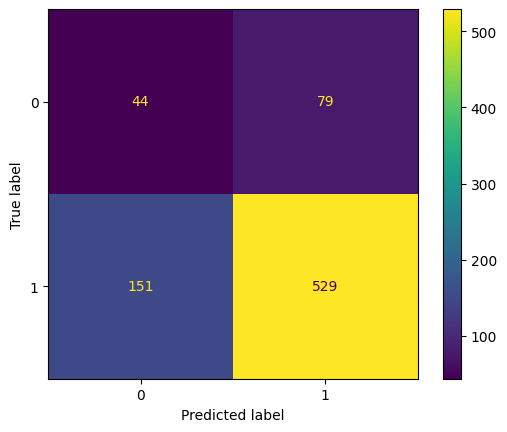

In [ ]:
# Perform testing on test dataset
y_pred = knn_gscv.predict(X_test)
# Construct a confusion matrix
cm_knn_gscv = confusion_matrix(y_test, y_pred, labels = knn_gscv.classes_)
disp_knn_gscv_cm = ConfusionMatrixDisplay(cm_knn_gscv, display_labels=knn_gscv.classes_)
disp_knn_gscv_cm.plot()
# Display the classification report
print(classification_report(y_test, y_pred))

GridSearch is finding 6 as the optimised k value which is smaller than 9 and the performance is worse than base KNN model. Grid search is misleading here, most likely due to the training split being on resampled data and testing set on normal distribution. So just in case trying to create a models manually for different K values

Reference:

Seminar 03 (week 04): page 11

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Manually evaluate multiple K values on the test set
# Limiting the range to 60 cause the total number of samples on class 0 for test split is 123, nearing that number or exceeding it can result in incorrect predictions
k_values = np.arange(1, 60)
results = []

for k in k_values:
    # Creating and training model
    model = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')
    model.fit(X_train_resampled, y_train_resampled)

    # Predicting and evaluating
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1_class0 = f1_score(y_test, y_pred, pos_label=0)
    f1_class1 = f1_score(y_test, y_pred, pos_label=1)
    recall_0 = recall_score(y_test, y_pred, pos_label=0)

    # Storing results
    results.append({
        'k': k,
        'accuracy': accuracy,
        'f1_class0': f1_class0,
        'f1_class1': f1_class1,
        'recall_class_0': recall_0
    })

# Converting to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Selecting best model based on F1 score for class 0 (likely the minority class)
best_k = results_df.sort_values(by=['f1_class0'], ascending=False).iloc[0]['k']

print(f"Selected best k value: {best_k}")

Selected best k value: 55.0


Traning the best model based on the tuned values

Reference:

Seminar 03 (week 04): page 07

In [ ]:
# Training the final model with best k
final_model = KNeighborsClassifier(
    n_neighbors=int(best_k),
    metric='manhattan',
    weights='distance'
)
final_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='manhattan', n_neighbors=55, weights='distance')

Evaluatiing the final model

Reference:

Seminar 03 (week 04): page 12

Final model performance:
              precision    recall  f1-score   support

           0       0.26      0.66      0.37       123
           1       0.91      0.66      0.77       680

    accuracy                           0.66       803
   macro avg       0.59      0.66      0.57       803
weighted avg       0.81      0.66      0.71       803



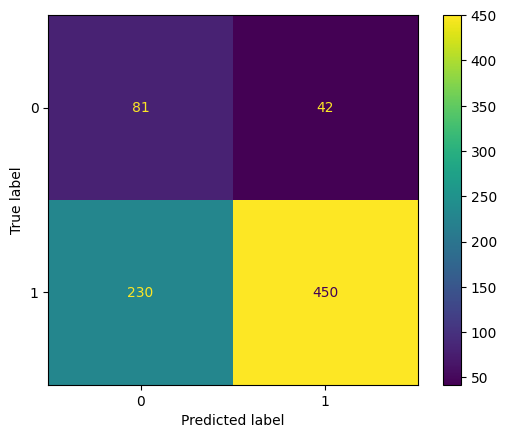

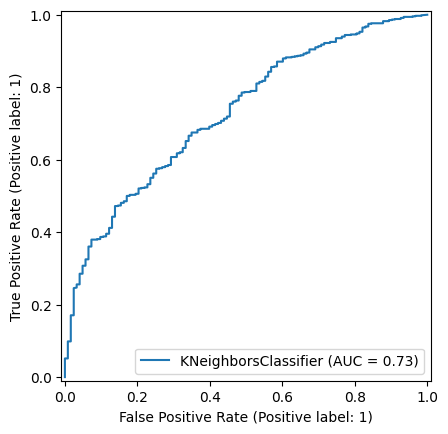

In [ ]:
final_pred = final_model.predict(X_test)
print("Final model performance:")
print(classification_report(y_test, final_pred))

# Plot confusion matrix
final_cm = confusion_matrix(y_test, final_pred, labels=final_model.classes_)
final_disp = ConfusionMatrixDisplay(final_cm, display_labels=final_model.classes_)
final_disp.plot()
plt.show()

knn_roc = RocCurveDisplay.from_estimator(final_model, X_test, y_test)

This final KNN model performs better than the initial base KNN model, cause even though it predicts less number of 1 records correctly (16 less), which is the majority class, the accurate predictions on the majority class is higher which is way more important (15 higher)

##Naive Bayes

Choosing Gaussian NB variant of NB cause most of the features are continuous in the dataset. Training the model on resampled data to deal with imbalanced classes.

Reference:

Seminar 03 (week 04): page 15

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initializing Gaussian NB
nb = GaussianNB()

# Fitting the model
nb.fit(X_train_resampled, y_train_resampled)

# Using the model to make predictions
y_pred_nb=nb.predict(X_test)

Evaluatiing the  model

Reference:

Seminar 03 (week 04): page 12

              precision    recall  f1-score   support

           0       0.26      0.65      0.37       123
           1       0.91      0.66      0.76       680

    accuracy                           0.66       803
   macro avg       0.58      0.65      0.57       803
weighted avg       0.81      0.66      0.70       803



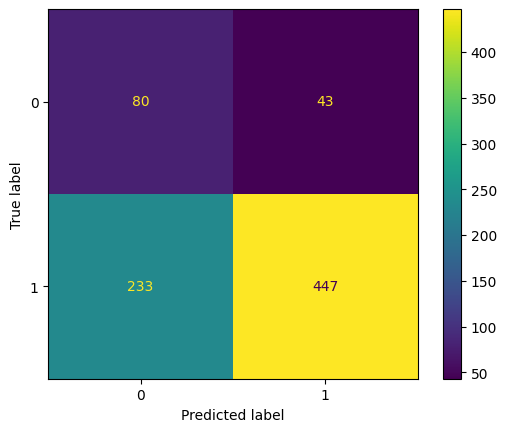

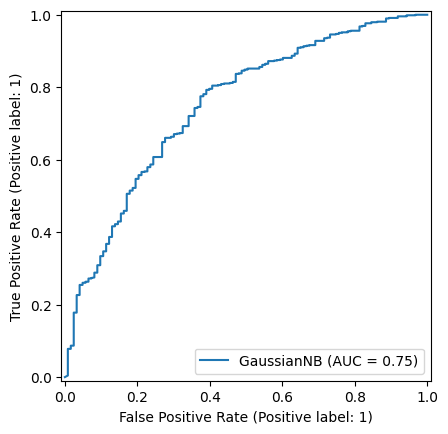

In [ ]:
# Printing the classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
final_cm = confusion_matrix(y_test, y_pred, labels=nb.classes_)
final_disp = ConfusionMatrixDisplay(final_cm, display_labels=nb.classes_)
final_disp.plot()
plt.show()

# ROC Curve
nb_roc = RocCurveDisplay.from_estimator(nb, X_test, y_test)

Base Gaussian NB performs very poorly even on resampled data. So I researched to see if there are any hyperparameters that I can tune. var_smoothing is similar to laplace smoothing which was discussed on lecture 03, where if a conditional probability is 0, then that can easily misclassify to a class.

Reference:

machine learning - How to tune GaussianNB? (no date). Stack Overflow. Available from https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb.

In [ ]:
# Initializing Gaussian NB
nb_classifier = GaussianNB()

# hyperparameter to tune
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialising GridSearch to focus more on recall
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 cv=5,
                 verbose=1,
                 scoring='f1')

# Training on the resampled  data
gs_NB.fit(X_train_resampled, y_train_resampled)

# Prining the best parameter
gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': np.float64(0.0657933224657568)}

Buidling the model with the optimal var_smoothing value

Reference:

Seminar 03 (week 04): page 12

In [ ]:
# Create and train the optimized model
optimal_nb = GaussianNB(var_smoothing=gs_NB.best_params_['var_smoothing'])
optimal_nb.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_nb = optimal_nb.predict(X_test)

Evaluationg the model

Reference:

Seminar 03 (week 04): page 15, 16

              precision    recall  f1-score   support

           0       0.32      0.57      0.41       123
           1       0.91      0.78      0.84       680

    accuracy                           0.75       803
   macro avg       0.62      0.68      0.63       803
weighted avg       0.82      0.75      0.78       803



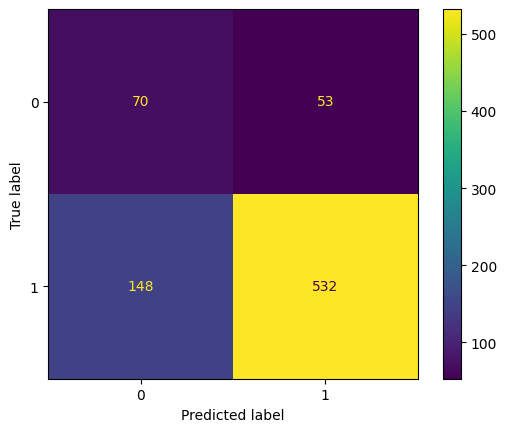

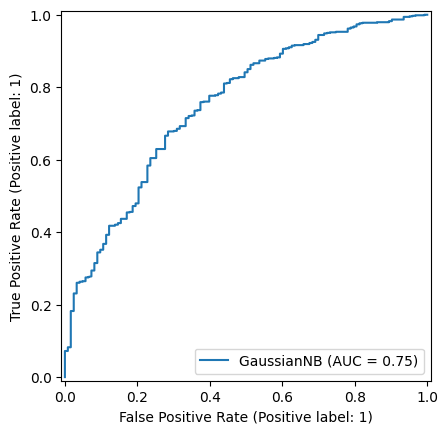

In [ ]:
# Classification report
print(classification_report(y_test, y_pred_nb))

# Plotting the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=optimal_nb.classes_)
disp_nb_cm = ConfusionMatrixDisplay(cm_nb, display_labels=optimal_nb.classes_)
disp_nb_cm.plot()

# Plotting the AUC graph
nb_roc = RocCurveDisplay.from_estimator(optimal_nb, X_test, y_test)

Since this is a medical dataset it is mandatory to keep the dead people getting classified as alive as low as possible.

To build the ensemble model on notebook 3, I have to use the models that I have created here. Using pickle to save the models to files

Reference:

Subash A. (2023). Saving and Loading Trained Machine Learning Models with Python: A Comprehensive Guide. Medium. Available from https://medium.com/@subashdhoni86/saving-and-loading-trained-machine-learning-models-with-python-a-comprehensive-guide-b6e661b4ec01.

In [ ]:
# To save the models to files
import pickle

# To save Logistic Regression model
with open('logreg_model.pkl', 'wb') as f:
    pickle.dump(logreg, f)

# To save smote applied Logistic Regression model
with open('logreg_model_tuned.pkl', 'wb') as f:
    pickle.dump(tuned_lr, f)

# To save KNN model
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

# To save Naive Bayes model
with open('nb_model.pkl', 'wb') as f:
    pickle.dump(optimal_nb, f)

print("Models saved successfully!")

Models saved successfully!


Since the coursework requires us to use 2 models out of the 3, I have to choose 2 among the 3.

Logistic Regression (LR) showed the highest overall performance and is selected as the first base learner. K-Nearest Neighbors (KNN) and Naïve Bayes (NB), both tuned for optimal performance, had identical recall, but NB demonstrated better precision for the "Dead" class. While LR already achieves the best overall recall, NB adds value by excelling in classifying "Alive" instances. Together, they are likely to complement each other well in the ensemble model.